# Startup Transformation Project
In this project, you’ll work as a data analyst for a tech startup that is looking to improve its operations after a global pandemic has taken the world by storm.

You will apply data transformation techniques to make better sense of the company’s data and help answer important questions such as:

Is the company in good financial health?
Does the company need to let go of any employees?
Should the company allow employees to work from home permanently?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
financial_data = pd.read_csv("financial_data.csv")

## 1. Analyzing Revenue and Expenses

### Step 1
The management team of the company you work for is concerned about the status of the company after a global pandemic.

The CFO (Chief Financial Officer) asks you to perform some data analysis on the past six months of the company’s financial data, which has been loaded in the variable financial_data.

First, examine the first few rows of the data using print() and .head()

In [3]:
financial_data.head()

,Month,Revenue,Expenses
0,1,1420000,510000
1,2,1200000,532000
2,3,1050000,551000
3,4,920000,612000
4,5,807000,628000


### Step 2
Notice that financial_data has three columns – Month, Revenue, and Expenses.

Store each column in three separate variables called month, revenue, and expenses.

In [4]:
Month = financial_data["Month"]
Revenue = financial_data["Revenue"]
Expenses = financial_data["Expenses"]

###  Step 3

Next, Create a plot of revenue over the past six months.

You can label and format the figure. 


Repeat these steps for monthly expenses. In other words, create a second plot of monthly expenses over the past 6 months. Note that you’ll need to use the function plot.clf() prior to creating this new plot. Otherwise, it will be plotted on-top of the revenue plot.

How are monthly expenses changing over time?

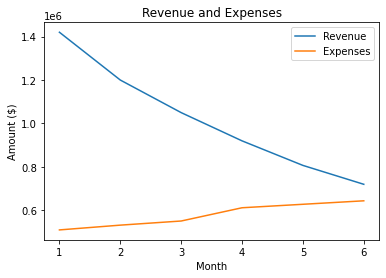

In [19]:
plt.plot(Month, Revenue)
plt.xlabel("Month")
plt.ylabel("Amount ($)")
plt.title("Revenue")

plt.plot(Month, Expenses)
plt.xlabel("Month")
plt.ylabel("Amount ($)")
plt.title("Revenue and Expenses")

plt.legend(["Revenue", "Expenses"])
plt.show()

In [20]:
# Spending has risen while income has fallen.

### Step 4

As shown, revenue seems to be quickly decreasing while expenses are increasing. If the current trend continues, expenses will soon surpass revenues, putting the company at risk.

After you show this chart to the management team, they are alarmed. They conclude that expenses must be cut immediately and give you a new file to analyze called expenses.csv.

Use pandas to read in expenses.csv and store it in a variable called expense_overview.

Print the first seven rows of the data.

In [21]:
expense_overview = pd.read_csv("expenses.csv")
expense_overview

,Expense,Proportion
0,Salaries,0.62
1,Advertising,0.15
2,Office Rent,0.15
3,Equipment,0.03
4,Utilities,0.03
5,Supples,0.01
6,Food,0.01


## 2. Pie Chart and Collapsing Categories

### Step 5

Notice that there are two columns:

- Expense: indicates the expense category
- Proportion: indicates how much of the overall expenses a specific category takes up

Store the Expense column in a variable called expense_categories and the Proportion column in a variable called proportions.

In [22]:
expense_categories = expense_overview["Expense"]
expense_categories

0       Salaries
1    Advertising
2    Office Rent
3      Equipment
4      Utilities
5        Supples
6           Food
Name: Expense, dtype: object

In [23]:
proportions = expense_overview["Proportion"]
proportions

0    0.62
1    0.15
2    0.15
3    0.03
4    0.03
5    0.01
6    0.01
Name: Proportion, dtype: float64

### Step 6
Next, we want to create a pie chart of the different expense categories. Use plt.clf() again to clear the previous plot, then create a pie chart using the plt.pie() method, passing in two arguments:

- proportions
- labels = expense_categories

Give your pie chart a title using plt.title(), then use plt.show() at the end to show the plot.

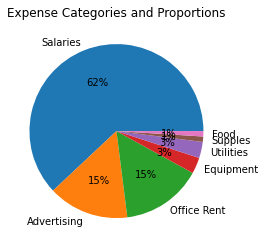

In [40]:
plt.pie(x = proportions, labels=expense_categories, autopct="%.f%%")
        
plt.title("Expense Categories and Proportions")
plt.show()

### Step 7
Notice that the pie chart currently looks deformed.

Above plt.show(), add in the following two lines of code to set the axis and adjust the spacing:

Take a moment to look at the pie chart. Which expense categories make up most of the data, and which ones aren’t so significant?

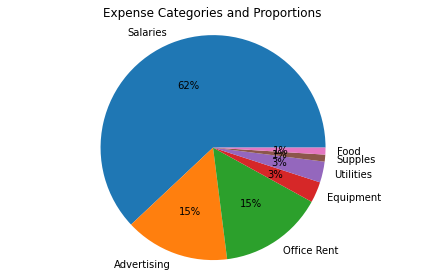

In [42]:
plt.pie(x = proportions, labels=expense_categories, autopct="%.f%%")
        
plt.title("Expense Categories and Proportions"),
plt.axis("Equal")
plt.tight_layout()
plt.show()

In [44]:
#  Salaries, Advertising, and Office rent categories make up most of the data
   #  and Food, Supples, Utilities, and Equipment aren’t so significant.

### Step 8

It seems that Salaries, Advertising, and Office Rent make up most of the expenses, while the rest of the categories make up a small percentage.

Before you hand this pie chart back to management, you would like to update the pie chart so that all categories making up less than 5% of the overall expenses (Equipment, Utilities, Supplies, and Food) are collapsed into an “Other” category.

Update the pie chart accordingly.

In [56]:
expense_categories = ["Salaries", "Advertising", "Office Rent", "Other"]
expense_categories

['Salaries', 'Advertising', 'Office Rent', 'Other']

In [60]:
proportions = [0.62, 0.15, 0.15, 0.08]

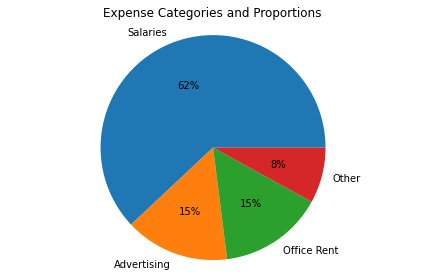

In [61]:
plt.pie(x = proportions, labels=expense_categories, autopct="%.f%%")
        
plt.title("Expense Categories and Proportions"),
plt.axis("Equal")
plt.tight_layout()
plt.show()

### Step 9

You should now see four categories in your updated pie chart:

- Salaries
- Advertising
- Office Rent
- Other

This simplified pie chart helps the management team see a big picture view of the company’s expenses without getting distracted by noisy data.

If the company wants to cut costs in a big way, which category do you think they should focus on? Put your answer in a string variable called expense_cut.

In [62]:
expense_cut = "Salaries"

##  3. Employee Productivity
### Step 10

Salaries make up 62% of expenses. The management team determines that to cut costs in a meaningful way, they must let go of some employees.

Each employee at the company is assigned a productivity score based on their work. The management would like to keep the most highly productive employees and let go of the least productive employees.

First, use pandas to load in employees.csv and store it in a variable called employees.

Print the first few rows of the data.

In [64]:
employees = pd.read_csv("employees.csv")
employees.head()

,Name,Salary,Productivity,Commute Time
0,Mason Pender,87902,29.91,16.79
1,Mia Rew,95672,49.91,44.48
2,Jalisa Kroenke,177864,78.00,19.40
3,Krystal Homeyer,186643,24.36,42.06
4,Kiana Wishart,167148,4.08,25.58


### Step 11
Notice that there is a Productivity column, which indicates the productivity score assigned to that employee.

Sort the employees data frame (in ascending order) by the Productivity column and store the result in a variable called sorted_productivity.

Print sorted_productivity.

In [67]:
sorted_productivity = employees.sort_values(by="Productivity", ascending=True)
sorted_productivity

,Name,Salary,Productivity,Commute Time
259,Wilber Rye,111647,0.06,49.42
92,Fredric Gandee,154469,0.24,22.48
252,Johnson Fordham,168684,1.46,22.39
178,Lilia Lemoine,167579,1.67,27.36
162,Hilma Laughton,85506,1.79,36.41
...,...,...,...,...
164,Miki Hartle,50856,99.54,31.39
88,Darell Nau,30530,99.63,44.25
23,Joaquina Neece,95562,99.66,48.65
202,Janae Officer,110139,99.69,15.45


### Step 12
You should now see the employees with the lowest productivity scores at the top of the data frame.

The company decides to let go of the 100 least productive employees.

Store the first 100 rows of sorted_productivity in a new variable called employees_cut and print out the result.

Unfortunately, this batch of employees won’t be so lucky.

In [68]:
employees_cut = sorted_productivity[:100]

In [71]:
employees_cut

,Name,Salary,Productivity,Commute Time
259,Wilber Rye,111647,0.06,49.42
92,Fredric Gandee,154469,0.24,22.48
252,Johnson Fordham,168684,1.46,22.39
178,Lilia Lemoine,167579,1.67,27.36
162,Hilma Laughton,85506,1.79,36.41
...,...,...,...,...
43,Bernardo Klingenberg,55464,34.52,32.27
186,Ashleigh Istre,178627,34.70,38.67
288,Penni Kimbrough,142680,35.21,49.64
269,Margot Mackenzie,114302,35.79,19.87


### Step 13
Your colleague Sarah, a data scientist at the company, would like to explore the relationship between Income and Productivity more in depth, but she points out that these two features are on vastly different scales.

For example, productivity is a feature that ranges from 0-100, but income is measured in the thousands of dollars.

Moreover, there are outliers in the data that add an additional layer of complexity.

She asks you for advice on how she should transform the data. Should she perform normalization, standardization, log transformation, or something else?

Put your answer in a string in a variable called transformation.

In [72]:
transformation = "standardization"

## 4. Commute Times and Log Transformation
### Step 14

The COO (Chief Operating Officer) is debating whether to allow employees to continue to work from home post-pandemic.

He first wants to take a look at roughly how long the average commute time is for employees at the company. He asks for your help to analyze this data.

The employees data frame has a column called Commute Time that stores the commute time (in minutes) for each employee.

Create a variable called commute_times that stores the Commute Time column.

In [75]:
commute_times = employees["Commute Time"]
commute_times

0      16.79
1      44.48
2      19.40
3      42.06
4      25.58
       ...  
295    54.34
296    58.05
297    38.18
298    12.16
299    34.53
Name: Commute Time, Length: 300, dtype: float64

### Step 15

Let’s explore the shape of the commute time data using a histogram.

First, use plt.clf() to clear the previous plots. Then use plt.hist() to plot the histogram of commute_times. Finally, use plt.show() to show the plot. Feel free to add labels above plt.show() if you would like to practice!

What do you notice about the shape of the data? Is it symmetric, left skewed, or right skewed?

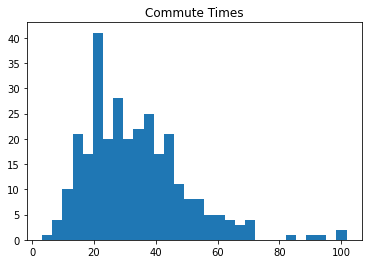

In [89]:
plt.hist(commute_times, bins=30)

plt.title("Commute Times")
plt.show()

In [ ]:
 # Right skewed.

### Step 16
The data seems to be skewed to the right. To make it more symmetrical, we might try applying a log transformation.

Right under the commute_times variable, create a variable called commute_times_log that stores a log-transformed version of commute_times.

To apply log-transform, you can use numpy’s log() function.

In [90]:
commute_times_log = np.log(commute_times)
commute_times_log

0      2.820783
1      3.795040
2      2.965273
3      3.739097
4      3.241811
         ...   
295    3.995261
296    4.061305
297    3.642312
298    2.498152
299    3.541829
Name: Commute Time, Length: 300, dtype: float64

### Step 17
Replace the histogram for commute_times with one for commute_times_log.

Notice how the shape of the data changes from being right skewed to a more symmetrical (and even slightly left-skewed) in shape. After applying log transformation, the transformed data is more “normal” than before.

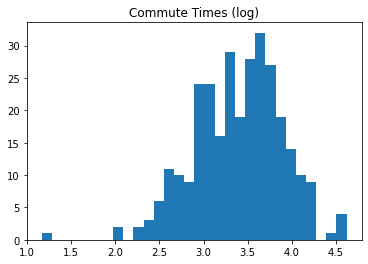

In [94]:
plt.hist(commute_times_log, bins=30)

plt.title("Commute Times (log)")
plt.show()

###  Extra
Congratulations! In this project, you performed data analysis to help a management team answer important questions about the status of the company during a difficult time.

You did this by analyzing data sets and applying common data transformation techniques. These are important skills to have as a data analyst.

If you’d like extra practice with data transformations, here are some suggestions to extend this project:

Apply standardization to the employees data using StandardScaler() from sklearn. Refer to this article if you need help.
Explore the income and productivity features in more detail. Can you find a relationship between productivity and income?
Happy coding!

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
scaler = StandardScaler()

In [104]:
scaler.fit_transform(employees.iloc[:,1:])

array([[-4.91647524e-01, -7.42476735e-01, -1.03417293e+00],
       [-3.31570692e-01, -3.80095281e-02,  6.85546286e-01],
       [ 1.36174140e+00,  9.51414664e-01, -8.72075889e-01],
       [ 1.54260556e+00, -9.37966385e-01,  5.35249409e-01],
       [ 1.14097135e+00, -1.65229613e+00, -4.88259898e-01],
       [-1.17159292e+00, -9.48885627e-01,  6.99209638e-01],
       [ 3.95594283e-01,  1.72562412e+00,  6.88651593e-01],
       [-6.14064067e-01,  4.68502394e-01, -9.27350360e-01],
       [-9.39368208e-01,  6.16725816e-02, -2.66540952e-01],
       [-1.59393206e+00,  1.52379427e+00,  6.08534663e-01],
       [ 2.44644097e-01, -1.89469978e-01, -1.28570283e+00],
       [-4.44633968e-01,  7.49232575e-01, -7.00662922e-01],
       [-1.59700504e-02,  1.76852970e-01, -1.00870941e+00],
       [-1.42326584e+00,  1.08843354e+00,  7.74358076e-01],
       [ 7.04458101e-01,  3.42754997e-01,  5.38975778e-01],
       [-1.41069868e+00, -7.72416591e-01, -1.23167048e+00],
       [ 4.73448897e-01, -1.35007970e+00

In [105]:
employees.head()

,Name,Salary,Productivity,Commute Time
0,Mason Pender,87902,29.91,16.79
1,Mia Rew,95672,49.91,44.48
2,Jalisa Kroenke,177864,78.00,19.40
3,Krystal Homeyer,186643,24.36,42.06
4,Kiana Wishart,167148,4.08,25.58


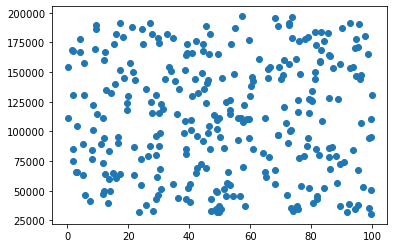

In [107]:
plt.scatter(x = employees["Productivity"], y = employees["Salary"]);

In [108]:
employees["Salary"].corr(employees["Productivity"])

0.017954037153537453

In [109]:
# No, There is no correlation between them.